# A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data (Wholesale Customer.csv) consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel/Restaurant/Café HoReCa, Retail).

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro

In [40]:
df_Customer=pd.read_csv('Wholesale Customer.csv')

In [41]:
df_Customer.shape

(440, 9)

In [6]:
df_Customer.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [42]:
df_Customer.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [44]:
df_Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
Buyer/Spender       440 non-null int64
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [43]:
df_Customer.describe()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F73A848>,
      dtype=object)

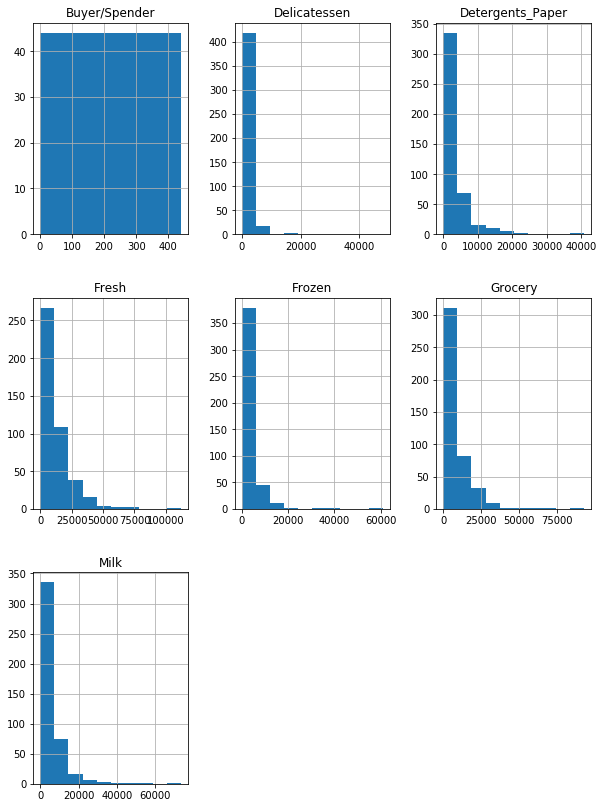

In [18]:
df_Customer.hist(figsize=(10, 14))

# Use methods of descriptive statistics to summarize data.  Which Region and which Channel seems to spend more?     Which Region and which Channel seems to spend less?


In [5]:
A=df_Customer.groupby(['Region','Channel'])
df_group_Cust=A.sum()
df_group_Cust['Total']=(df_group_Cust['Fresh']+df_group_Cust['Milk']+df_group_Cust['Grocery']+
                        df_group_Cust['Frozen']+df_group_Cust['Detergents_Paper']+df_group_Cust['Delicatessen'])
df_group_Cust

Buyer/Spender    Fresh     Milk  Grocery  Frozen  \
Region Channel                                                     
Lisbon Hotel            14026   761233   228342   237542  184512   
       Retail            4069    93600   194112   332495   46514   
Oporto Hotel             8988   326215    64519   123074  160861   
       Retail            5911   138506   174625   310200   29271   
Other  Hotel            48020  2928269   735753   820101  771606   
       Retail           16006  1032308  1153006  1675150  158886   

                Detergents_Paper  Delicatessen    Total  
Region Channel                                           
Lisbon Hotel               56081         70632  1538342  
       Retail             148055         33695   848471  
Oporto Hotel               13516         30965   719150  
       Retail             159795         23541   835938  
Other  Hotel              165990        320358  5742077  
       Retail             724420        191752  4935522

In [33]:
df_group_Cust[df_group_Cust['Total']==df_group_Cust['Total'].max()]

,,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,Channel,,,,,,,,
Other,Hotel,48020,2928269,735753,820101,771606,165990,320358,5742077


In [35]:
df_group_Cust[df_group_Cust['Total']==df_group_Cust['Total'].min()]

,,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Region,Channel,,,,,,,,
Oporto,Hotel,8988,326215,64519,123074,160861,13516,30965,719150


# There are 6 different varieties of items are considered.Do all varieties show similar behaviour across Region and Channel?

In [22]:
corr=df_group_Cust[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.586536,0.430275,0.975821,0.145486,0.960679
Milk,0.586536,1.000000,0.982274,0.413518,0.884437,0.782290
Grocery,0.430275,0.982274,1.000000,0.246646,0.954496,0.659254
Frozen,0.975821,0.413518,0.246646,1.000000,-0.051482,0.888419
Detergents_Paper,0.145486,0.884437,0.954496,-0.051482,1.000000,0.408325
Delicatessen,0.960679,0.782290,0.659254,0.888419,0.408325,1.000000


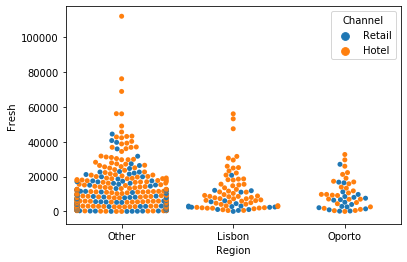

In [51]:
sns.swarmplot(df_Customer['Region'],df_Customer['Fresh'],hue=df_Customer['Channel'])

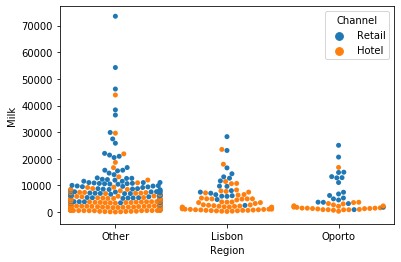

In [52]:
sns.swarmplot(df_Customer['Region'],df_Customer['Milk'],hue=df_Customer['Channel'])

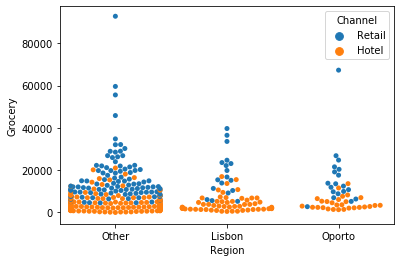

In [53]:
sns.swarmplot(df_Customer['Region'],df_Customer['Grocery'],hue=df_Customer['Channel'])

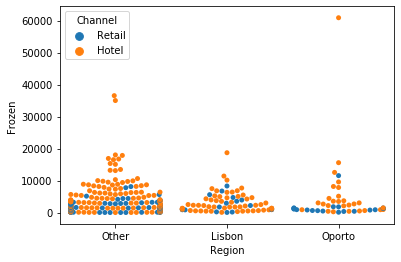

In [54]:
sns.swarmplot(df_Customer['Region'],df_Customer['Frozen'],hue=df_Customer['Channel'])

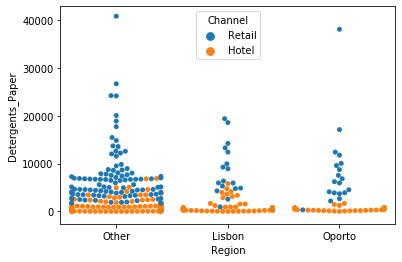

In [55]:
sns.swarmplot(df_Customer['Region'],df_Customer['Detergents_Paper'],hue=df_Customer['Channel'])

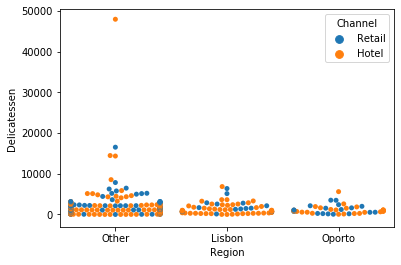

In [56]:
sns.swarmplot(df_Customer['Region'],df_Customer['Delicatessen'],hue=df_Customer['Channel'])

#On the basis of the descriptive measure of variability, which item shows the most inconsistent behaviour?Which items shows the least inconsistent behaviour?


In [31]:
df_Customer.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [67]:
A=df_Customer.mean()-(2*df_Customer.std())

Buyer/Spender         -33.822630
Fresh              -13294.360003
Milk                -8964.488440
Grocery            -11055.048385
Frozen              -6637.414847
Detergents_Paper    -6654.215714
Delicatessen        -4115.341420
dtype: float64

In [65]:
#Consider Alpha = 95%
#Fresh
df_Customer.Fresh.var()
B=df_Customer.mean()+(2*df_Customer.std())

Buyer/Spender         474.822630
Fresh               37294.955457
Milk                20557.020258
Grocery             26957.602931
Frozen              12781.278483
Detergents_Paper    12417.202078
Delicatessen         7165.082329
dtype: float64

In [70]:
A=df_Customer.mean()-(2*df_Customer.std())
B=df_Customer.mean()+(2*df_Customer.std())
B-A

Buyer/Spender         508.645259
Fresh               50589.315460
Milk                29521.508698
Grocery             38012.651316
Frozen              19418.693330
Detergents_Paper    19071.417792
Delicatessen        11280.423749
dtype: float64

# Are there any outliers in the data?

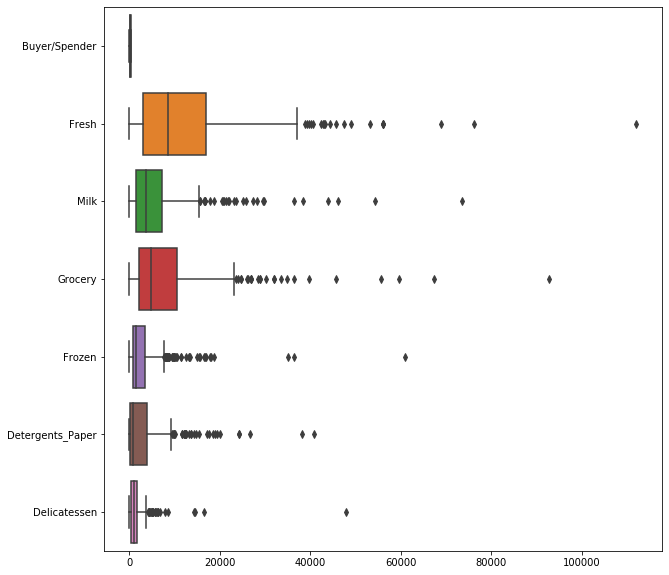

In [74]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df_Customer,orient='h')

In [ ]:
# CONCLUSION : 

#Outlier Data : Fresh,Milk,Gracery,Frozen,Detergents_Paper,Delicatessen 
#Non Outliers: Buyer/Spender

# On the basis of this report, what are the recommendations?

In [76]:
corr=df_Customer[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].corr()
corr

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [ ]:
#Recomendation

#1. In All Region and Channel keep Grocery and Detergents_Paper together to get the sales high
#2. Grocery and Milk nearer in All Region and Channel together to get the sales high
#3.For Lisbon Region reduce the supply of Frozen Item in Retail Channel as there is less sales

# The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey.csv file).


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind,shapiro

In [29]:
df_Survey=pd.read_csv('Survey.csv')

In [30]:
df_Survey.shape

(62, 14)

In [33]:
df_Survey.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

In [31]:
df_Survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [34]:
df_Survey.head().T

,0,1,2,3,4
ID,1,2,3,4,5
Gender,Female,Male,Male,Male,Male
Age,20,23,21,21,23
Class,Junior,Senior,Junior,Junior,Senior
Major,Other,Management,Other,CIS,Other
Grad Intention,Yes,Yes,Yes,Yes,Undecided
GPA,2.9,3.6,2.5,2.5,2.8
Employment,Full-Time,Part-Time,Part-Time,Full-Time,Unemployed
Salary,50,25,45,40,40
Social Networking,1,1,2,4,2


In [46]:
df_Survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [48]:
df_Survey.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,62.0,31.500000,18.041619,1.0,16.25,31.50,46.75,62.0
Age,62.0,21.129032,1.431311,18.0,20.00,21.00,22.00,26.0
GPA,62.0,3.129032,0.377388,2.3,2.90,3.15,3.40,3.9
Salary,62.0,48.548387,12.080912,25.0,40.00,50.00,55.00,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.00,1.00,2.00,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.00,4.00,4.00,6.0
Spending,62.0,482.016129,221.953805,100.0,312.50,500.00,600.00,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.00,200.00,300.00,900.0


In [49]:
df_Survey.columns

Index(['ID', 'Gender', 'Age', 'Class', 'Major', 'Grad Intention', 'GPA',
       'Employment', 'Salary', 'Social Networking', 'Satisfaction', 'Spending',
       'Computer', 'Text Messages'],
      dtype='object')

# For this data, construct the following contingency tables (Keep Gender as row variable)

    2.1.1. Gender and Major
    2.1.2. Gender and Grad Intention
    2.1.3. Gender and Employment
    2.1.4. Gender and Computer


In [51]:
pd.crosstab(df_Survey['Gender'],df_Survey['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [52]:
pd.crosstab(df_Survey['Gender'],df_Survey['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [55]:
pd.crosstab(df_Survey['Gender'],df_Survey['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [56]:
pd.crosstab(df_Survey['Gender'],df_Survey['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


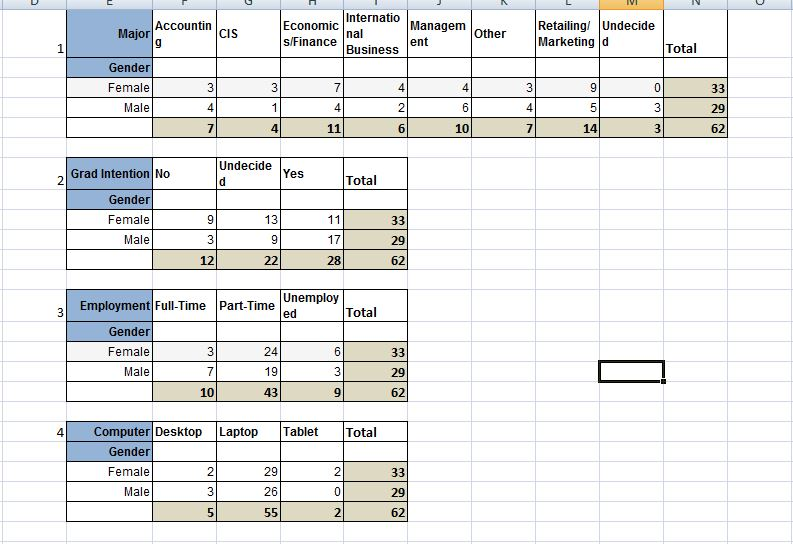

In [60]:
from IPython.display import Image
Image(filename='Contingency_tables.JPG',width=800,height=800)

# Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions:

# What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female?


# 
Male

In [35]:
Total_Students=62
Male_Students=33
P_Male=Male_Students/Total_Students
print('Probability of randomly selected CMSU student will be male %1.4f' % P_Male)

Probability of randomly selected CMSU student will be male 0.5323


# 
Female

In [37]:
Total_Students=62
Female_Students=29
P_Female=Female_Students/Total_Students
print('Probability of randomly selected CMSU student will be female %1.4f' % P_Female)

Probability of randomly selected CMSU student will be female 0.4677


# Find the conditional probability of different majors among the male students in CMSU.Find the conditional probability of different majors among the female students of CMSU.


# 
Male

In [10]:
Total_Male=29
Male_Major=pd.DataFrame({'Major_By_Male_Students':[4,1,4,2,6,4,5,3]},
               index=['Accounting','CIS','Economics/Finance','International Business','Management','Other',
                      'Retailing/Marketing', 'Undecided'])
Male_Major['Probty_Diff_Major_Male']=Male_Major['Major_By_Male_Students']/Total_Male
Male_Major

,Major_By_Male_Students,Probty_Diff_Major_Male
Accounting,4,0.137931
CIS,1,0.034483
Economics/Finance,4,0.137931
International Business,2,0.068966
Management,6,0.206897
Other,4,0.137931
Retailing/Marketing,5,0.172414
Undecided,3,0.103448


In [ ]:
#Conclusion :different majors among the male students in CMSU

Accounting                0.137931
CIS                       0.034483
Economics/Finance         0.137931
International Business    0.068966
Management                0.206897
Other                     0.137931
Retailing/Marketing       0.172414
Undecided                 0.103448

# 
Female

In [11]:
Total_FeMale=33
FeMale_Major=pd.DataFrame({'Major_By_FeMale_Students':[3,3,7,4,4,3,9,0]},
               index=['Accounting','CIS','Economics/Finance','International Business','Management','Other',
                      'Retailing/Marketing', 'Undecided'])
FeMale_Major['Probty_Diff_Major_FeMale']=FeMale_Major['Major_By_FeMale_Students']/Total_FeMale
FeMale_Major

,Major_By_FeMale_Students,Probty_Diff_Major_FeMale
Accounting,3,0.090909
CIS,3,0.090909
Economics/Finance,7,0.212121
International Business,4,0.121212
Management,4,0.121212
Other,3,0.090909
Retailing/Marketing,9,0.272727
Undecided,0,0.000000


In [ ]:
#Conclusion :different majors among the female students in CMSU

Accounting                0.090909
CIS                       0.090909
Economics/Finance         0.212121
International Business    0.121212
Management                0.121212
Other                     0.090909
Retailing/Marketing       0.272727
Undecided                 0.000000

# Find the conditional probability of intent to graduate, given that the student is a male.Find the conditional probability of intent to graduate, given that the student is a female.


In [12]:
Total_Male=29
Total_FeMale=33

In [13]:
Male_Intent_graduate=pd.DataFrame({'Intent_graduate_By_Male_Students':[3,9,17]},
               index=['No','Undecided','Yes'])
Male_Intent_graduate['Probty_Intent_graduate_Male']=Male_Intent_graduate['Intent_graduate_By_Male_Students']/Total_Male
Male_Intent_graduate

,Intent_graduate_By_Male_Students,Probty_Intent_graduate_Male
No,3,0.103448
Undecided,9,0.310345
Yes,17,0.586207


In [ ]:
#Conclusion :Probability of Male students having the intension of graduation

No         0.103448
Undecided  0.310345
Yes        0.586207

In [97]:
FeMale_Intent_graduate=pd.DataFrame({'Intent_graduate_By_FeMale_Students':[9,13,11
]},
               index=['No','Undecided','Yes'])
FeMale_Intent_graduate['Probty_Intent_graduate_FeMale']=FeMale_Intent_graduate['Intent_graduate_By_FeMale_Students']/Total_FeMale
FeMale_Intent_graduate

,Intent_graduate_By_FeMale_Students,Probty_Intent_graduate_FeMale
No,9,0.272727
Undecided,13,0.393939
Yes,11,0.333333


# FInal Formulae

P(No|Male) = P(Male|No) *P(No)
            -------------------------------------------------------
            P(Male|No) *P(No) + P(Male|UD) *P(UD) + P(Male|Yes) *P(Yes))
        
            =3/29*3/12
            -------------------------------------------------------
            3/29*3/12 + 9/29*9/22 + 17/29*17/28
        
        
P(UD|Male) = P(Male|UD) *P(UD)
            -------------------------------------------------------
            P(Male|No) *P(No) + P(Male|UD) *P(UD) + P(Male|Yes) *P(Yes))
           
            =9/29*9/22
            -------------------------------------------------------
            3/29*3/12 + 9/29*9/22 + 17/29*17/28       
        
        
P(Yes|Male) = P(Male|Yes) *P(Yes)
            -------------------------------------------------------
            P(Male|No) *P(No) + P(Male|UD) *P(UD) + P(Male|Yes) *P(Yes))
        
            =17/29*17/28
            -------------------------------------------------------
            3/29*3/12 + 9/29*9/22 + 17/29*17/28          
        
        
P(No|FeMale) = P(FeMale|No) *P(no)
            -------------------------------------------------------
            P(FeMale|No) *P(No) + P(FeMale|UD) *P(UD) + P(FeMale|Yes) *P(Yes))

          = 9/33*9/12
            -------------------------------------------------------
            9/33*9/12 + 13/33*13/22 +11/33*11/28
            
        
P(UD|FeMale) = P(FeMale|UD) *P(UD)
            -------------------------------------------------------
            P(FeMale|No) *P(No) + P(FeMale|UD) *P(UD) + P(FeMale|Yes) *P(Yes))
                  = 13/33*13/22
            -------------------------------------------------------
            9/33*9/12 + 13/33*13/22 +11/33*11/28
        
        
P(Yes|FeMale) = P(FeMale|Yes) *P(Yes)
            -------------------------------------------------------
            P(FeMale|No) *P(No) + P(FeMale|UD) *P(UD) + P(FeMale|Yes) *P(Yes)) 
                          = 11/33*11/28
            -------------------------------------------------------
            9/33*9/12 + 13/33*13/22 +11/33*11/28

In [11]:
#Male
M=((3/29*3/12))+((9/29*9/22))+((17/29)*(17/28))

In [10]:
#Female
F=((9/33*9/12) + (13/33*13/22 )+(11/33*11/28))

# Conclusion
P(No|Male)=0.050836268

P(UD|Male)=0.249559859

P(Yes|Male)=0.699603873

P(No|FeMale=0.359937673

P(UD|FeMale)=0.409626039

P_(Yes|FeMale)=0.230436288


# Find the conditional probability of employment status for the male students as well as for the female students.

In [98]:
Total_Male=29
Total_FeMale=33

In [14]:
Male_Emp_Status=pd.DataFrame({'Emp_Status_By_Male_Students':[7,19,3]},
               index=['Full-Time','Part-Time','Unemployed'])
Male_Emp_Status['Probty_Emp_Status_Male']=Male_Emp_Status['Emp_Status_By_Male_Students']/Total_Male
Male_Emp_Status

,Emp_Status_By_Male_Students,Probty_Emp_Status_Male
Full-Time,7,0.241379
Part-Time,19,0.655172
Unemployed,3,0.103448


In [ ]:
#Conclusion :Probability of employment status for the male students

Full-Time   0.241379
Part-Time   0.655172
Unemployed  0.103448

In [15]:
FeMale_Emp_Status=pd.DataFrame({'Emp_Status_By_FeMale_Students':[3,24,6]},
               index=['Full-Time','Part-Time','Unemployed'])
FeMale_Emp_Status['Probty_Emp_Status_FeMale']=FeMale_Emp_Status['Emp_Status_By_FeMale_Students']/Total_FeMale
FeMale_Emp_Status

,Emp_Status_By_FeMale_Students,Probty_Emp_Status_FeMale
Full-Time,3,0.090909
Part-Time,24,0.727273
Unemployed,6,0.181818


In [17]:
#Conclusion :Probability of employment status for the female students

#Full-Time   0.090909
#Part-Time   0.727273
#Unemployed  0.181818

In [38]:
#FInal Code
Total_Students=62
ES=pd.DataFrame({'Emp_Status_By_total_Students':[10,43,9]},
               index=['Full-Time','Part-Time','Unemployed'])
ES['Probability_Emp_Status']=ES['Emp_Status_By_total_Students']/Total_Students
ES

,Emp_Status_By_total_Students,Probability_Emp_Status
Full-Time,10,0.161290
Part-Time,43,0.693548
Unemployed,9,0.145161


# Find the conditional probability of laptop preference among the male students as well as among the female students.

In [118]:
Male_Computer=pd.DataFrame({'Computer_By_Male_Students':[3,26,0]},
               index=['Desktop','Laptop','Tablet'])
Male_Computer['Probty_Computer_Male']=Male_Computer['Computer_By_Male_Students']/Total_Male
Male_Computer

,Computer_By_Male_Students,Probty_Computer_Male
Desktop,3,0.103448
Laptop,26,0.896552
Tablet,0,0.000000


In [119]:
FeMale_Computer=pd.DataFrame({'Computer_By_FeMale_Students':[2,29,2]},
               index=['Desktop','Laptop','Tablet'])
FeMale_Computer['Probty_Computer_FeMale']=FeMale_Computer['Computer_By_FeMale_Students']/Total_FeMale
FeMale_Computer

,Computer_By_FeMale_Students,Probty_Computer_FeMale
Desktop,2,0.060606
Laptop,29,0.878788
Tablet,2,0.060606


In [6]:
#Final Code
Total_Students=62
COMP=pd.DataFrame({'Computer_By_total_Students':[5,55,2]},
               index=['Desktop','Laptop','Tablet'])
COMP['Probability_Computer']=COMP['Computer_By_total_Students']/Total_Students
COMP

,Computer_By_total_Students,Probability_Computer
Desktop,5,0.080645
Laptop,55,0.887097
Tablet,2,0.032258


In [ ]:
#Conclusion :

#conditional probability of laptop preference among the male students as well as among the female students : 0.887097 

# Based on the above probabilities, do you think that the column variable in each case is independent of Gender? Justify your comment in each case.


#     
H0 : Mean value of Male students based on different columns = Mean value of FeMale students based on different columns

HA : Mean value of Male students based on different columns <> Mean value of FeMale students based on different columns

Alpha=0.05

In [111]:
t_statistic, p_value = ttest_ind(Male_Major['Major_By_Male_Students'], FeMale_Major['Major_By_FeMale_Students'])
print(t_statistic,p_value)

-0.4448368899464655 0.6632376240724351


In [115]:
t_statistic, p_value = ttest_ind(Male_Intent_graduate['Intent_graduate_By_Male_Students'], FeMale_Intent_graduate['Intent_graduate_By_FeMale_Students'])
print(t_statistic,p_value)

-0.3162277660168381 0.767643915238903


In [116]:
t_statistic, p_value = ttest_ind(Male_Emp_Status['Emp_Status_By_Male_Students'], FeMale_Emp_Status['Emp_Status_By_FeMale_Students'])
print(t_statistic,p_value)

-0.16398401233815763 0.8776961703942681


In [120]:
t_statistic, p_value = ttest_ind(Male_Computer['Computer_By_Male_Students'], FeMale_Computer['Computer_By_FeMale_Students'])
print(t_statistic,p_value)

-0.1094351310329166 0.9181277913183603


In [ ]:
#Conclusion:

# ttest_ind testing for Male and Female Groups for 4 variables is greater than 0.05. 

#So Failed to reject null hypothesis. All these 4 columns are independent of Gender.

# Note that there are three numerical (continuous) variables in the data set, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.                                      Write a note summarizing your conclusions.[Recall that symmetric histogram does not necessarily mean that the underlying distribution is symmetric]
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001435F408>,
      dtype=object)

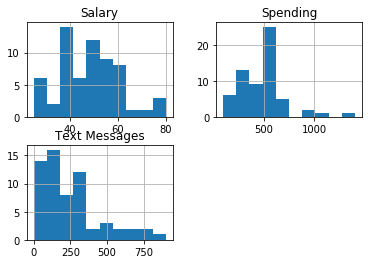

In [121]:
df_Survey[['Salary','Spending','Text Messages']].hist()

In [134]:
#H0=Samples for Salary ,SPending and text messages follow normal distribution
#HA=Samples for Salary ,SPending and text messages donot follow normal distribution
#Alpha =0.05

In [122]:
#Shapiro test for checking normal distribution 
shapiro(df_Survey['Salary'])
#0.028000956401228905 < 0.05 
#Salary is not following normal distribution

(0.9565856456756592, 0.028000956401228905)

In [125]:
#Shapiro test for checking normal distribution 
shapiro(df_Survey['Spending'])
#1.6854661225806922e-05 < 0.05 
#Spending is not following normal distribution

(0.8777452111244202, 1.6854661225806922e-05)

In [126]:
#Shapiro test for checking normal distribution 
shapiro(df_Survey['Text Messages'])
#4.324040673964191e-06 < 0.05 
#Text Messages is not following normal distribution

(0.8594191074371338, 4.324040673964191e-06)

In [128]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df_Survey['Salary']),stats.skew(df_Survey['Spending']),stats.skew(df_Survey['Text Messages'])]},
                        index=['Salary','Spending','TM'])
Skewness

,Skewness
Salary,0.521677
Spending,1.547285
TM,1.264245


In [ ]:
#Conclusion : 

#Salary,Spending and Text Message sample data is highly skewed
#Eventhough by looking into graph ,data is showing as normally distributes but by using shapiro test , all the 3 columns are not having normal distribution.


# An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company claims that the mean moisture content cannot be greater than 0.35 pound per 100 square feet.
The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

1. For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

2. For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

3. Do you think that the population means for shingles A and B are equal?
Form the hypothesis and conduct the test of the hypothesis.
What assumption do you need to check before the test for equality of means is performed?

4. What assumption about the population distribution is needed in order to conduct the hypothesis tests above?

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp, ttest_ind,shapiro

In [21]:
#Data Extraction
df_Shingles=pd.read_csv('A & B shingles-1.csv')

In [22]:
df_Shingles.shape

(36, 2)

In [26]:
df_Shingles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
A    36 non-null float64
B    31 non-null float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [23]:
df_Shingles.isnull().sum()
#5 null values in Column 'B'

A    0
B    5
dtype: int64

In [27]:
df_Shingles.head(5)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [6]:
df_Shingles.tail(5)

,A,B
31,0.40,NaN
32,0.29,NaN
33,0.43,NaN
34,0.34,NaN
35,0.37,NaN


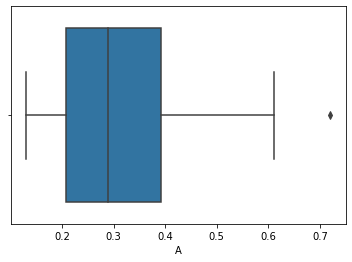

In [24]:
sns.boxplot(df_Shingles['A'])

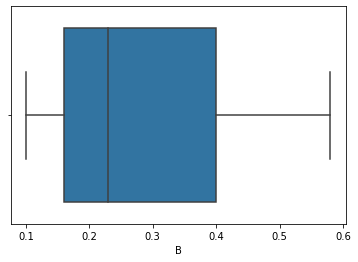

In [25]:
sns.boxplot(df_Shingles['B'])

In [10]:
df_Shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [11]:
#Filling the null values in column B with the mean of column 'B'
df_Shingles['B'].fillna(value=df_Shingles['B'].mean(),inplace=True) 
df_Shingles.tail(5)

,A,B
31,0.40,0.273548
32,0.29,0.273548
33,0.43,0.273548
34,0.34,0.273548
35,0.37,0.273548


In [13]:
df_Shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.290000,0.3925,0.72
B,36.0,0.273548,0.127112,0.10,0.1675,0.266774,0.3750,0.58


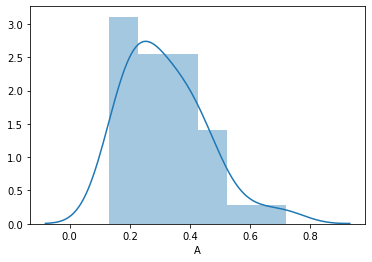

In [28]:
sns.distplot(df_Shingles['A'])

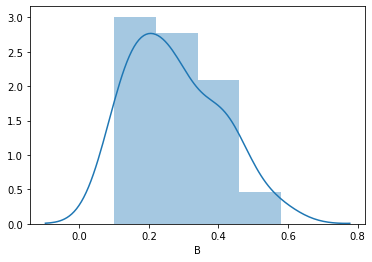

In [29]:
sns.distplot(df_Shingles['B'])

In [33]:
shapiro(df_Shingles['A'])
#0.042670514434576035 < 0.05  --Sample A is not normal distributed with 5% significance of Alpha

(0.9375598430633545, 0.042670514434576035)

In [35]:
shapiro(df_Shingles['B'])
#0.05664224550127983 > 0.05  --Sample B is normal distributed with 5% significance of Alpha

(0.9415169358253479, 0.05664224550127983)

#  For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

In [36]:
#Null Hypothesis(H0):  Mean moisture content of column A Shingles is lesser than or equal to 
#0.35 pound per 100 square feet ( Mu(A)<=0.35/100 sq feet)

#Alternative Hypothesis(HA):  Mean moisture content of column A Shingles is greater 
#than 0.35 pound per 100 square feet( Mu(A)>0.35/100 sq feet)

#Perform 1 sample t-test on sample A

In [37]:
t_statistic, p_value = ttest_1samp(df_Shingles['A'], 0.35)
print(t_statistic,p_value)

-1.4735046253382782 0.14955266289815025


In [ ]:
#Conclusion : 0.14955266289815025 > 0.05 , Failed to Reject Null Hypothesis. i.e Average mean of A Shingles is not 
#greater than 0.35/100 sq feet

#  For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.

In [ ]:
#Null Hypothesis(H0):  Mean moisture content of column B Shingles is lesser than or equal 
#to 0.35 pound per 100 square feet ( Mu(A)<=0.35/100 sq feet)

#Alternative Hypothesis(HA):  Mean moisture content of column B Shingles is greater 
#than 0.35 pound per 100 square feet( Mu(A)>0.35/100 sq feet)

#Perform 1 sample t-test on sample B

In [38]:
t_statistic, p_value = ttest_1samp(df_Shingles['B'], 0.35)
print(t_statistic,p_value)

-3.6087093437269284 0.0009520322539994948


In [ ]:
#Conclusion : 0.0009520322539994948 < 0.05 , Reject Null Hypothesis

#i.e Average mean of A Shingles is greater than 0.35/100 sq feet

#  Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [39]:
#Level of significance(Alpha) = 0.05 
#Sigma is unknown so we will perform t-test on the data
#Sample A and Sample B are from same population of Shingles moisture measurements
# Will conduct 1 sample t-test for this case


#Hypothesis Definition:
# H0 : Sample mean of column A shingles is equal to Sample mean of  B Shingles (MuA=MuB OR MuA-MuB=0)
# HA: Sample mean of column A shingles is not equal to Sample mean of  B Shingles (MuA!=MuB)

In [40]:
t_statistic, p_value = ttest_1samp(df_Shingles['A'] - df_Shingles['B'], 0)
print(t_statistic, p_value)

1.195876486522785 0.23978407038988642


In [41]:
# 0.23978407038988642 > 0.05 , Null Hypothesis will fly

#i.e  Average means of sample A and samples B are equal with 5% significance of Alpha 

#  What assumption about the population distribution is needed in order to conduct the hypothesis tests above?